In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
path='C:\Downloads\S&P500'
company_list =['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])


In [176]:
all_data.shape

(4752, 7)

In [177]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [178]:
##analyse closing price of all the stocks
##enumerate to name a list of things separately, one by one
tech_list=all_data['Name'].unique()

In [179]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

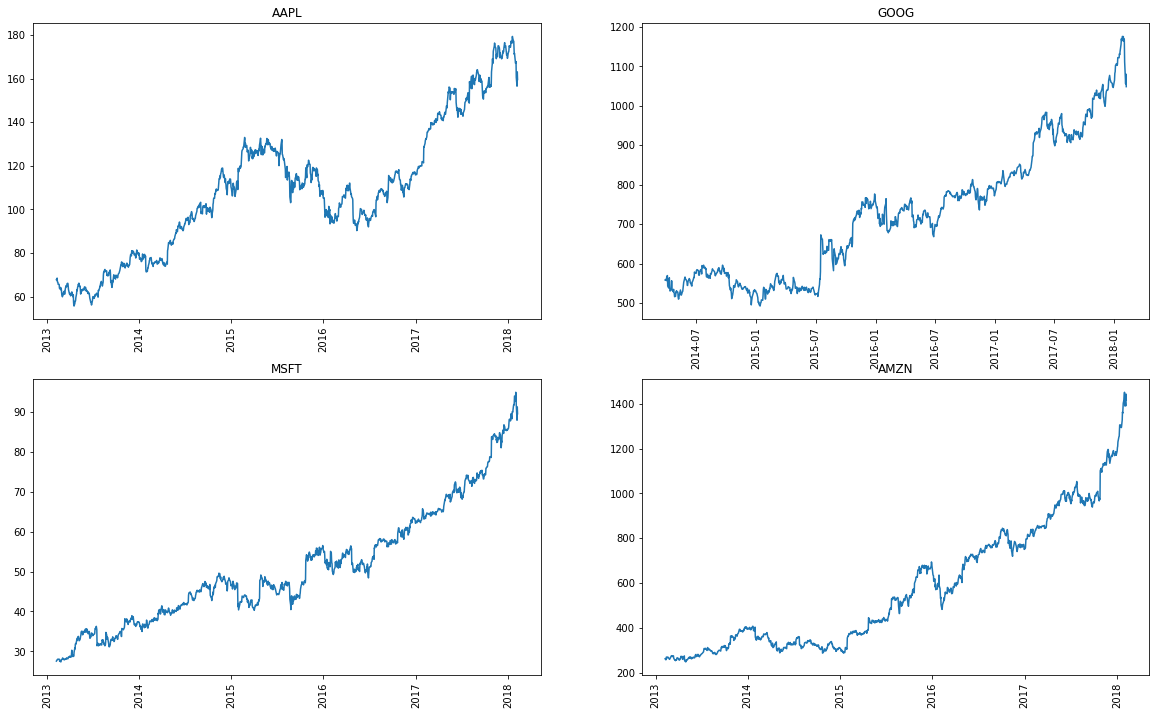

In [184]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    

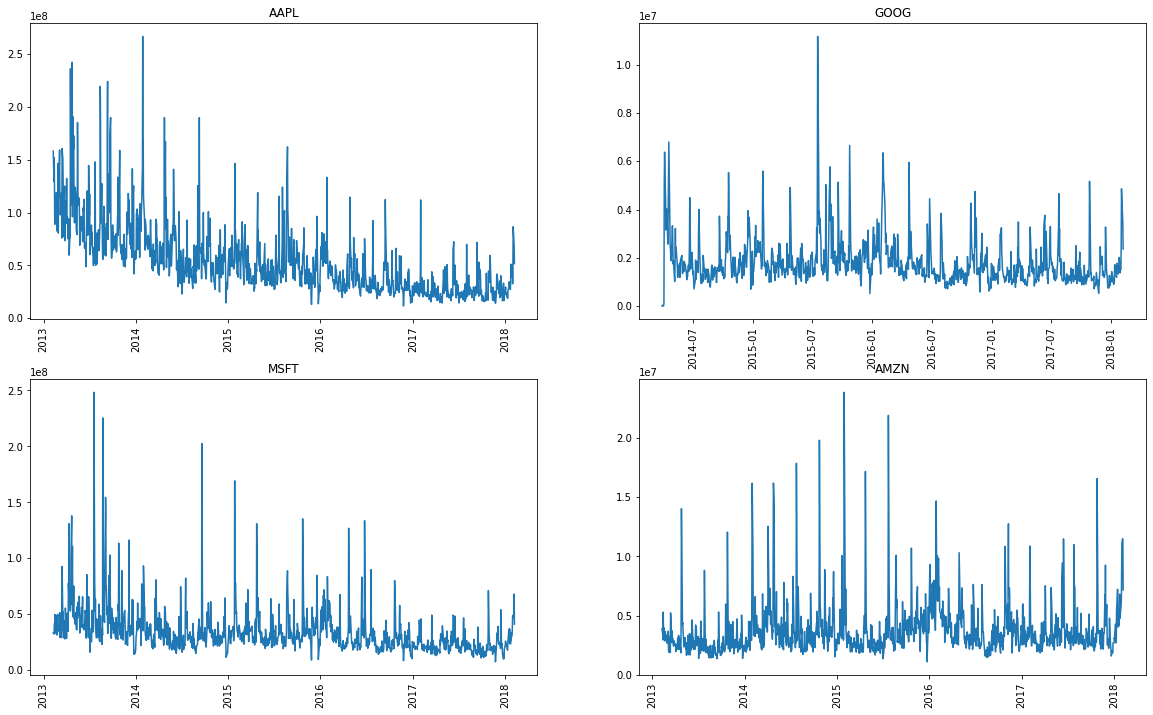

In [185]:
##analyse the total volume of stock being traded each day
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    

In [186]:
all_data['date']=pd.to_datetime(all_data['date'])

In [187]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [188]:
#analyse daily price change in stock
t=pd.read_csv('C:\Downloads\S&P500/AAPL_data.csv')
t.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [189]:
t['daily_price_change']=t['close']-t['open']
t.head()

,date,open,high,low,close,volume,Name,daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [190]:
t['1day % return']=((t['close']-t['open'])/t['close'])*100

In [191]:
t.head()

,date,open,high,low,close,volume,Name,daily_price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [192]:
t.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
1day % return         float64
dtype: object

Text(0.5, 1.0, 'Apple daily return on stock prices')

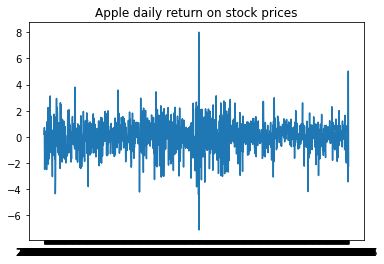

In [193]:
plt.plot(t['date'],t['1day % return'])
plt.title('Apple daily return on stock prices')

In [194]:
##analyse monthly mean of close features
t1=t.copy()

In [196]:
t1.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
1day % return         float64
dtype: object

In [197]:
t1['date']=pd.to_datetime(t1['date'])
t1.set_index('date',inplace=True)


In [198]:
t1.head()

,open,high,low,close,volume,Name,daily_price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


<AxesSubplot:xlabel='date'>

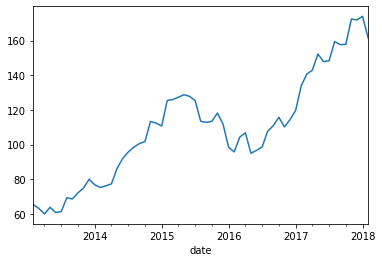

In [199]:
t1['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

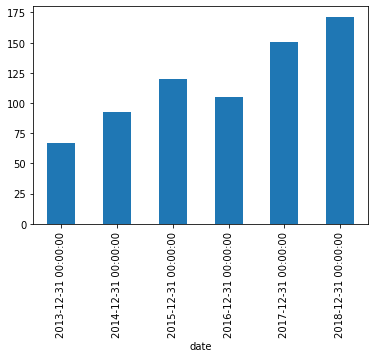

In [200]:
t1['close'].resample('Y').mean().plot(kind='bar')

In [201]:
##analyse whether stock prices of these tech companies are correlated or not
apple=pd.read_csv('C:\Downloads\S&P500/AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [202]:
amzn=pd.read_csv('C:\Downloads\S&P500/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [203]:
msft=pd.read_csv('C:\Downloads\S&P500/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [204]:
goog=pd.read_csv('C:\Downloads\S&P500/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [205]:
close=pd.DataFrame()

In [206]:
close['apple']=apple['close']
close['goog']=goog['close']
close['msft']=msft['close']
close['amzn']=amzn['close']

In [207]:
close.head()

,apple,goog,msft,amzn
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


In [ ]:
##to corelation between closing stock price of tech companies
##histogram shows same companies correlation which doesnot make any sense

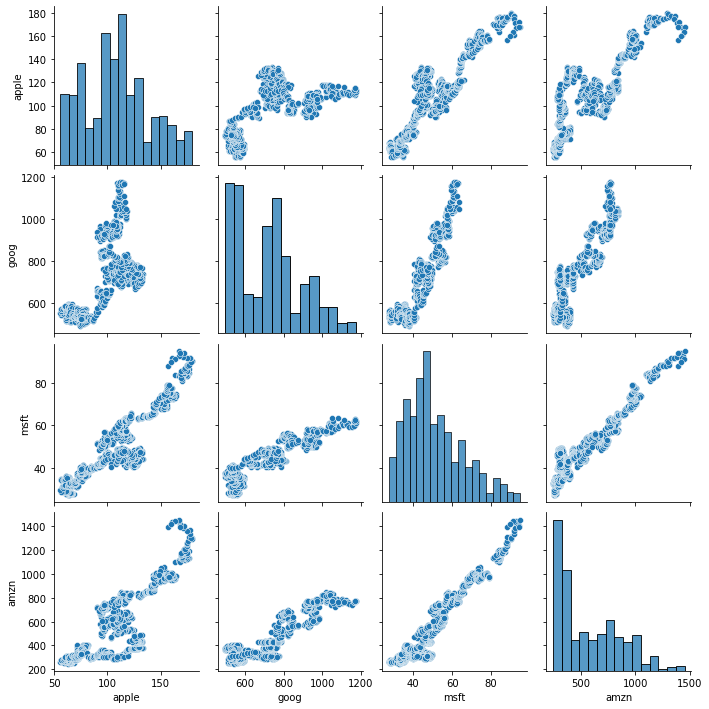

In [208]:
import seaborn as sns
sns.pairplot(close)

<AxesSubplot:>

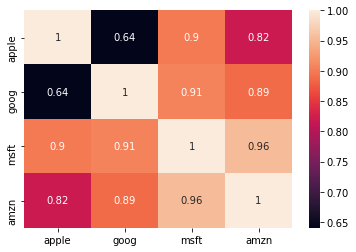

In [209]:
sns.heatmap(close.corr(),annot=True)

In [210]:
##Analyse daily return of each stock and how they are corelated
data =pd.DataFrame()
data['appl_change']=(apple['close']-apple['open'])/apple['close']*100

In [211]:
data['goog_change']=(goog['close']-goog['open'])/goog['close']*100
data['amzn_change']=(amzn['close']-amzn['open'])/amzn['close']*100
data['msft_change']=(msft['close']-msft['open'])/msft['close']*100

In [212]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


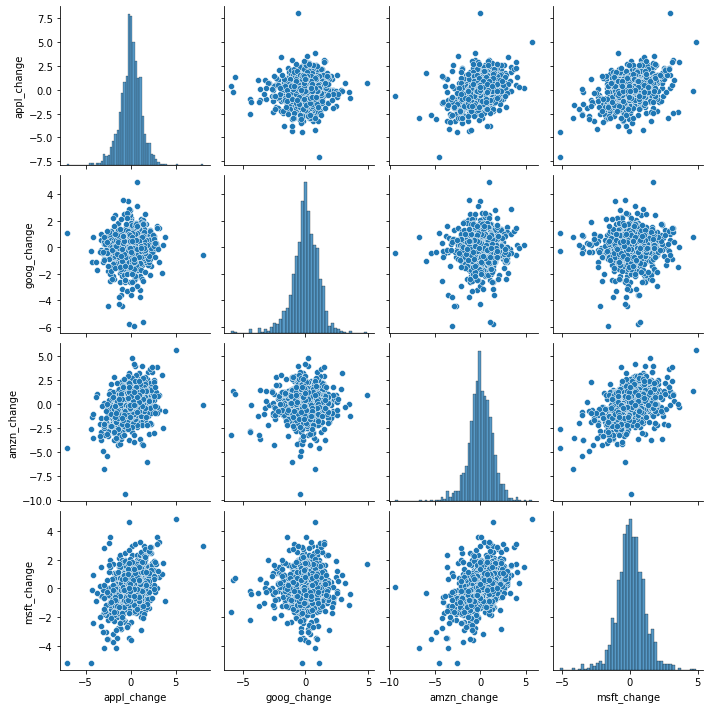

In [213]:
sns.pairplot(data)

<AxesSubplot:>

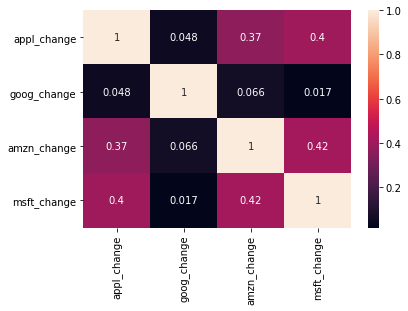

In [214]:
sns.heatmap(data.corr(),annot=True) ##there is corelation between amazon and microsoft daily return of each stock 

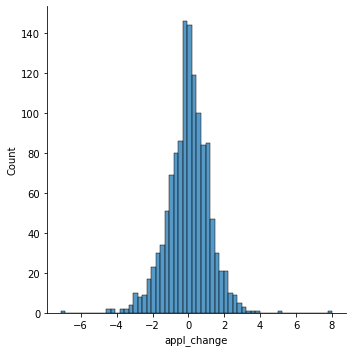

In [215]:
## value at risk analysis 
sns.displot(data['appl_change'])

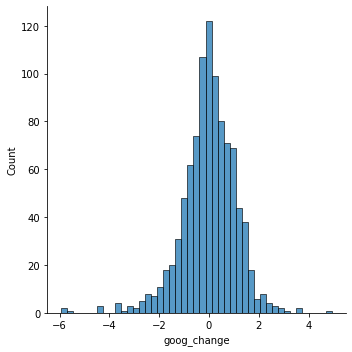

In [216]:
sns.displot(data['goog_change'])

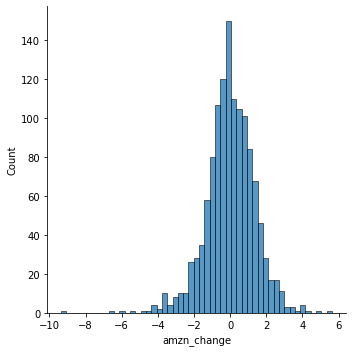

In [217]:
sns.displot(data['amzn_change'])

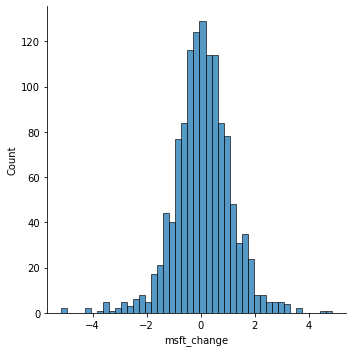

In [218]:
sns.displot(data['msft_change'])

In [219]:
#all follows the normal distribution graph.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491


In [220]:
##for predicting the stock prices :
## values of stock prices in past* e^y where y =today's stock price/Past stock price
## term  e^y is a random value which  nneed to be predicted.

In [221]:
msft2=msft
msft2.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT
1258,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT


In [222]:
msft2.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [223]:
msft2['date']=pd.to_datetime(msft2['date'])

In [224]:
msft2['1day % return']=((msft2['close']-msft2['open'])/msft2['close'])
msft2

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT,0.007260
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT,0.007538
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT,0.000000
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT,0.003568
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT,0.004280
...,...,...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,-0.005623
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,-0.020266
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,-0.029091
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,0.048615


Text(0.5, 1.0, 'Microsoft daily return on stock prices')

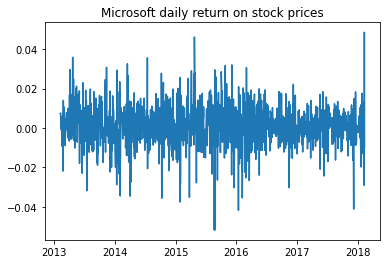

In [225]:
plt.plot(msft2['date'],msft2['1day % return'])
plt.title('Microsoft daily return on stock prices')

In [226]:
t2=msft2['1day % return'].mean()
t2

0.0007640397566597967

In [227]:
var=msft2['1day % return'].var()
var

0.0001122030904184584

In [228]:
drift = (t2 - (0.5*var))
drift =pd.Series(drift)
drift
##drift = (mean-0.5*variance)
##drift is a parameter that indicates trend or a growth rate
##here drift is calculated as expected daily returns of the stock 

0    0.000708
dtype: float64

In [229]:
stdev = msft2['1day % return'].std()
stdev =pd.Series(stdev)
stdev

0    0.010593
dtype: float64

In [230]:
type(drift)

pandas.core.series.Series

In [231]:
type(stdev)

pandas.core.series.Series

In [232]:
np.array(drift)

array([0.00070794])

In [233]:
stdev.values

array([0.0105926])

In [234]:
import scipy
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [235]:
x=np.random.rand(10,2)
x

array([[9.68669308e-01, 6.14777318e-01],
       [1.65241282e-01, 7.70326998e-01],
       [7.80105547e-02, 3.49558805e-01],
       [7.87646210e-01, 1.11911884e-01],
       [7.17318280e-01, 6.50434239e-04],
       [2.12744712e-01, 6.54449550e-01],
       [8.54818129e-01, 1.98063358e-01],
       [6.31043872e-01, 6.77150398e-01],
       [7.35738347e-01, 1.07086657e-01],
       [6.35093133e-01, 3.96292186e-01]])

In [236]:
norm.ppf(x)

array([[ 1.86158659,  0.29179239],
       [-0.97314234,  0.73992417],
       [-1.41858134, -0.38651187],
       [ 0.79828076, -1.21642315],
       [ 0.57489333, -3.2157881 ],
       [-0.79693389,  0.3973615 ],
       [ 1.057324  , -0.84855902],
       [ 0.33461934,  0.45974508],
       [ 0.63026181, -1.24217144],
       [ 0.34537332, -0.26295616]])

In [237]:
z=norm.ppf(np.random.rand(10,2))
z
## z corresponds to the distance b/w the mean and the events, expressed as no of SD.

array([[-0.00358914, -0.09591839],
       [-0.44926956,  1.61395922],
       [ 0.76418942,  1.64938732],
       [ 0.30275694, -0.09581823],
       [-1.14427572, -0.88553371],
       [ 1.03599124, -0.57778262],
       [ 0.88046735,  1.08838203],
       [-0.08298384,  0.05661254],
       [-0.48140907,  0.62094118],
       [-0.71184084, -0.80588146]])

In [238]:
t_intervals =100
iteration =10

In [239]:
daily_returns =np.exp(drift.values+stdev.values* norm.ppf(np.random.rand(t_intervals,iteration))) ## giving me term  e^y
##y= drift values + Random value.
## random value = SD * Z(rand(0;1))

In [240]:
daily_returns 

array([[1.01329977, 1.0161    , 1.00390542, 0.9971084 , 0.99391616,
        1.00665899, 0.99415757, 1.00070187, 1.01896944, 1.02228539],
       [0.99965981, 1.00467047, 0.98701176, 0.98525604, 1.00399508,
        1.01341046, 1.00994968, 0.99734001, 1.01835052, 1.0079735 ],
       [1.02862519, 0.99633124, 1.0033558 , 0.97883232, 0.99551299,
        1.00149735, 1.00141325, 1.00475097, 0.98818825, 0.99880624],
       [0.9989381 , 1.01226502, 0.99076699, 0.99500638, 0.99579443,
        0.99736624, 1.00247813, 0.98880218, 1.00210822, 1.0086969 ],
       [1.00406802, 0.996626  , 0.9860972 , 1.00406531, 1.03512836,
        0.9788105 , 0.99567496, 1.00648067, 1.00024559, 0.99111237],
       [0.98682127, 1.00075598, 0.98310271, 1.00057012, 1.02307746,
        1.0003626 , 1.00125747, 0.99742017, 1.00848948, 1.01138288],
       [1.00362964, 1.00492543, 0.99783512, 0.99499839, 1.00586639,
        1.00175955, 0.97023109, 1.0111484 , 1.00374758, 0.99913089],
       [0.99836629, 1.00511642, 1.0101015

In [241]:
s=msft2['close'].iloc[-1]
s #last closing stock price of date 7th feb 2018

89.61

In [242]:
v=np.zeros_like(daily_returns)
v

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [243]:
v[0]=s
v

array([[89.61, 89.61, 89.61, 89.61, 89.61, 89.61, 89.61, 89.61, 89.61,
        89.61],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , 

In [244]:
for t in range(1,t_intervals):
    v[t]=v[t-1]*daily_returns[t]

In [245]:
v #stock price for next 100 days after 7th feb 2018 with a closing stock price 89.61

array([[ 89.61      ,  89.61      ,  89.61      ,  89.61      ,
         89.61      ,  89.61      ,  89.61      ,  89.61      ,
         89.61      ,  89.61      ],
       [ 89.57951537,  90.02852077,  88.44612376,  88.28879342,
         89.96799953,  90.81171158,  90.50159098,  89.37163801,
         91.25439052,  90.32450494],
       [ 92.1437463 ,  89.69822765,  88.74293103,  86.41992431,
         89.56431186,  90.9476887 ,  90.62949216,  89.79623972,
         90.1765165 ,  90.21667875],
       [ 92.04589898,  90.79837816,  87.92356691,  85.98837588,
         89.18764332,  90.70815452,  90.85408384,  88.79071777,
         90.36662872,  91.00128439],
       [ 92.42034342,  90.49202475,  86.70118315,  86.33794562,
         92.32065893,  88.78609377,  90.46113625,  89.36614115,
         90.38882165,  90.19249907],
       [ 91.20236073,  90.56043485,  85.23616796,  86.38716877,
         94.45118503,  88.81828764,  90.57488859,  89.13559176,
         91.15617581,  91.2191498 ],
       [ 9

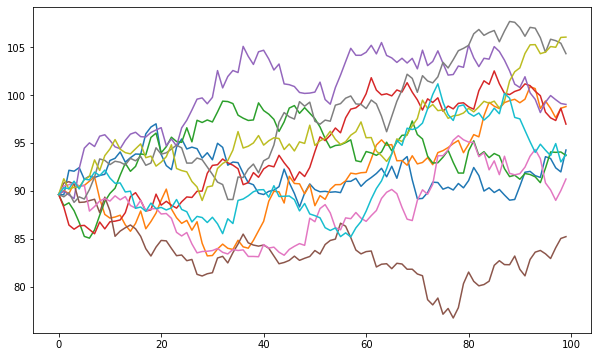

In [246]:
plt.figure(figsize=(10,6))
plt.plot(v);